# **Personal Details**
**Full name**: Konstantinos Gerogiannis  
**Studies**: Electrical and Computer Engineering, AUTh  
**Email**: kostas.gerogiannis04@gmail.com



## **Summary**
In this Colab, we are attempting to achieve the highest possible accuracy on the MNIST dataset using an MLP (Multi-Layer Perceptron) neural network. The code is written in the Python language and utilizes the PyTorch framework.

## **Importing libraries**

First, we import useful libraries:

* PyTorch libraries for deep learning.
* Matplotlib library for data visualization.
* Time library for measuring code execution time.
* Numpy library for efficient mathematical operations and handling large-scale data.
* Random library for random operations within the program.

In [ ]:
from torch.utils.data import random_split, DataLoader
from torchvision.datasets.fakedata import transforms
import torch
from torchvision import datasets
from torch.nn import Sequential,ReLU,Linear, Conv2d
import torch.optim

import matplotlib.pyplot as plt
import time
import numpy as np
import random

## **Loading data: MNIST dataset**

We load the dataset's data into variables `train_data` and `validation_data` in tensor format (the data is downloaded from the appropriate website).

We display the number of samples in the training and validation sets and choose to process 32 images at a time (batch size is set to 32).

In [ ]:
train_data = datasets.MNIST('data', train=True,download=True, transform =transforms.ToTensor())
test_data = datasets.MNIST('data', train=False,download=True, transform =transforms.ToTensor())
print('Total samples of train set:', len(train_data))
print('Total samples of validation set:', len(test_data))
batch_size = 32
train_loader = DataLoader(train_data,batch_size=batch_size)
test_loader = DataLoader(test_data,batch_size = batch_size)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Total samples of train set: 60000
Total samples of validation set: 10000


## **Function for images plotting**


* Function _show_image_:
A helper function that we will use below, to which we pass a list of images (variable data) and the image we want to display from the list. The function prints it on the screen.

this is an example of the above function


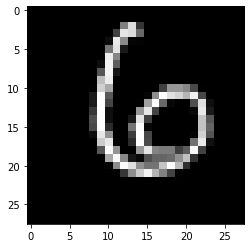

In [ ]:
def show_image(sample,data):
  x = data[sample][0][0]
  # print('Image pixel dimensions = ',torch.Tensor.size(x))
  plt.imshow(x,cmap='gray')

print('this is an example of the above function')
show_image(100,test_data)

## **Creating the model**

* Function _create_model_:
This function is responsible for creating the MLP model that we will use.
We have the option to create a model with either one or two hidden layers using the variable _hidden_layers_, which takes values from the set (1,2).
In either case, we can configure the number of neurons to be used in the hidden layers using the variable _neurons_. If we have chosen one hidden layer, we should provide an integer value for the neurons variable. If we have two hidden layers, then we should provide a list of length 2.
The function creates a neural network with linear layers and ReLU as the activation function.

In [ ]:
def create_model(hidden_layers, neurons):
  if hidden_layers == 1:
    model = Sequential(
      # in channels = size of image
      # out channels = size of outputs
      Linear(in_features=28*28,out_features= 128),
      ReLU(),
      Linear(128,10)
      )
  elif hidden_layers == 2:
    model = Sequential(
      # in channels = size of image
      # out channels = size of outputs
      Linear(in_features=28*28,out_features= neurons[0]),
      ReLU(),
      Linear(neurons[0],neurons[1]),
      ReLU(),
      Linear(neurons[1],10)
      )
  return model

## **Validating the model**

* Function _validate_:
  1. Arguments:
    * model: The desired model that we want to test.
    * presentation: A boolean variable created for the needs of the presentation of the work. When it takes the value True, the function, in addition to calculating accuracy as it does anyway, provides examples of correct and incorrect model predictions.

  2. Description:
    The function is called by the _train_ function (explained below) and is used to check the model after it has been trained.
    Initially, we create empty arrays for predictions, to store the model's predictions for each image, and official_labels, to store the actual values of each image (these values come ready-made from the dataset).
    We load the data batch by batch and immediately store the image values we receive in the official_labels list we created earlier. The images are stored in the variable images, which is a 4-dimensional array with a size of (batch_size, 1, 28, 28). The numbers 28, 28 represent the height and width in pixels of each image we receive and are constant for this dataset, while the number 1 is the number of channels. Here it has a value of 1 because our images are grayscale. It could have a value of 3 for an RGB image. We immediately reshape the images array, keeping the first dimension constant, and flatten each image.

    We call the model with the condition torch.no_grad to ensure that no changes/improvements are made to the weights, as we are in the model evaluation stage and not in the training stage. The model's prediction is the node with the highest value (10 output nodes), which we store in the predictions array.
    We calculate the accuracy of the model as the percentage of correct predictions out of the total number of images in the set.

    If the presentation variable is activated, we continue by dividing the predictions into two additional lists, one with correct predictions and one with incorrect predictions. We choose one image where the model was correct and one where it made an incorrect prediction, displaying the predictions it made.

In [ ]:
def validate(model, presentation):
  # losses = np.array
  predictions = np.array
  official_labels = np.array
  for batch in test_loader:
    images,labels = batch
    official_labels = np.append(official_labels,labels)
    # images exei diastash bx1x28x28, opou b to batch_size, channels_number=1,pixels=28x28
    b = images.size(0)

    # to -1 thetei ws deyterh diastash twn pollaplasiasmo olwn twn ypoloipwn, edw 1x28x28.
    # ara x exei diastash: (b,28x28)
    images = images.view(b,-1) # kanw reshape

      
    with torch.no_grad():
      y_predicted = model(images)
    
    # calculated_loss = loss(y_predicted,labels)
    # losses = np.append(losses,calculated_loss.item())
    # print('Validation loss= ',torch.tensor(losses).mean())

    
    y_predicted,positions = torch.max(y_predicted,1)

    predictions = np.append(predictions,positions)


  correct = np.sum(predictions == official_labels)
  total = len(official_labels)
  print(f"Test Set Accuracy = {correct*100./total}")
  if presentation:
    false_predictions = np.reshape(np.where(official_labels != predictions),-1)
    correct_predictions = np.reshape(np.where(official_labels == predictions),-1)


    number_of_samples = 3
    random_false_images = random.choices(false_predictions,k=number_of_samples)

    print("Let's print some wrong predictions.")
    fig = plt.figure()
    fig.tight_layout()
    for count in range(number_of_samples):
      ax1 = fig.add_subplot('1'+str(number_of_samples)+str(count+1))
      ax1.title.set_text(f"True value: {official_labels[random_false_images[count]]}\npredicted value: {predictions[random_false_images[count]]}")
      ax1.get_xaxis().set_ticks([])
      ax1.get_yaxis().set_ticks([])
      show_image(random_false_images[count]-1,test_data)
    plt.show()
    print('\n')

    random_correct_images = random.choices(correct_predictions,k=number_of_samples)

    print("We can also print correct predictions :)")
    fig = plt.figure()
    fig.tight_layout()
    for count in range(number_of_samples):
      ax1 = fig.add_subplot('1'+str(number_of_samples)+str(count+1))
      ax1.title.set_text(f"True value: {official_labels[random_correct_images[count]]}\npredicted value: {predictions[random_correct_images[count]]}")
      ax1.get_xaxis().set_ticks([])
      ax1.get_yaxis().set_ticks([])
      show_image(random_correct_images[count]-1,test_data)
    plt.show()
    plt.show()

## **Training the model**

* Function train(hidden_layers, neurons, epochs, learning_rate, presentation=False):
  This function serves as the main function of the program. It is where the model is trained.
  1. Arguments:
    * hidden_layers: We have the option to create a model with either one or two hidden layers using the hidden_layers variable, which takes values from the set (1, 2).
    * neurons: We can adjust the number of neurons to be used in the hidden layers through the neurons variable. If we have chosen one hidden layer, we should provide an integer value for the neurons variable. If we have two hidden layers, we provide a list with a length of 2.
    * epochs: The number of epochs we desire during the model's training.
    * learning_rate: The learning rate.
    * presentation: A boolean variable created for the presentation purposes of the work. It is passed as an argument to the _validate_ function.
  2. Summary:
    We call the create_model function with the appropriate arguments and create our model in the variable model. We choose cross-entropy as the loss function, which is based on entropy calculation. We select gradient descent as the optimizer.
    For each epoch, we load data in batches from the training set and reshape the images we receive, just like in the validate function. This time, we aim to improve the model's weight values. We make sure to zero out the values of grads from the previous iteration and perform backpropagation.
    If the presentation variable is set to True, for each epoch, we print the accuracy of the model to show its continuous improvement. When all epochs are completed, and the model has finished its training, it's time to perform validation by calling the _validate_ function defined earlier.
    Finally, we print on the screen the time it took for the model to complete its training and estimate the images from the validation set.


In [ ]:
def train(hidden_layers,neurons,epochs,learning_rate, presentation=False):
  model = create_model(hidden_layers,neurons)
  params = model.parameters()
  # loss function
  loss = torch.nn.CrossEntropyLoss()
  
  # optimizer for weights
  optimizer = torch.optim.SGD(params=params,lr = learning_rate)
  start = time.time()

  for epoch in range(epochs):
    total = 0
    correct = 0
    for batch in train_loader:
      images,labels = batch
      total += len(labels)
      # x exei diastash bx1x28x28, opou b to batch_size, channels_number=1,pixels=28x28
      b = images.size(0)

      # to -1 thetei ws deyterh diastash twn pollaplasiasmo olwn twn ypoloipwn, edw 1x28x28.
      # ara x exei diastash: (b,28x28)
      images = images.view(b,-1) # kanw reshape
      y_predicted = model(images)
    
      calculated_loss = loss(y_predicted,labels)
      y_predicted,positions = torch.max(y_predicted,1)
      correct += torch.sum(labels == positions)

      optimizer.zero_grad()
      calculated_loss.backward()
      optimizer.step() 

    if presentation:
      print('epoch= ',epoch)
      print(f"Training Set Accuracy = {correct*100./total}")

  if not presentation:
    print(f"Training Set Accuracy after all epochs= {correct*100./total}")
  validate(model,presentation)
  finish = time.time()
  print('Total elapsed time in seconds: ',finish - start)
  print('\n')

### **Experiments**  
Since the code has already been written, various experiments will be conducted in which the parameters will take values from the following set:

* Number of hidden layers: (1,2)
* Neurons: (32,64,128,256) per hidden layer

**Observations** 

1. The number of epochs will remain constant and set to 10. As we increase this value, the accuracy gradually increases and converges to a certain value.
2. The learning rate will also remain constant. Increasing the learning rate speeds up the convergence of the neural network to its maximum accuracy. However, if a very high value is provided for this variable, the network may fail to converge.
3. The results of interest include the time required for training and testing the algorithm, the accuracy on the training set, and the accuracy on the validation set after all epochs have completed. Various experiments will follow in separate cells.

#### **Model training and presentation of correct/wrong predictions**

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1. Hidden layers = 1, neurons = 64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
epoch=  0
Training Set Accuracy = 85.0433349609375
epoch=  1
Training Set Accuracy = 91.13999938964844
epoch=  2
Training Set Accuracy = 92.49666595458984
epoch=  3
Training Set Accuracy = 93.49166870117188
epoch=  4
Training Set Accuracy = 94.27166748046875
epoch=  5
Training Set Accuracy = 94.87333679199219
epoch=  6
Training Set Accuracy = 95.42333221435547
epoch=  7
Training Set Accuracy = 95.79000091552734
epoch=  8
Training Set Accuracy = 96.12833404541016
epoch=  9
Training Set Accuracy = 96.4183349609375
Test Set Accuracy = 96.27037296270373
Let's print some wrong predictions.


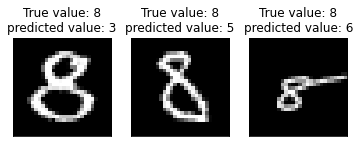



We can also print correct predictions :)


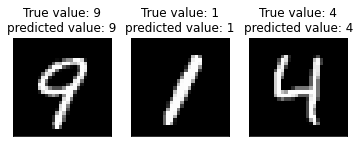

Total elapsed time in seconds:  86.32668018341064




In [ ]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('1. Hidden layers = 1, neurons = 64')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
train(hidden_layers=1,neurons=64,epochs=10,learning_rate=0.02,presentation = True)

#### **Experiments using different values in each parameter**

In [ ]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('2. Hidden layers = 1, neurons = 128')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
train(hidden_layers=1,neurons=128,epochs=10,learning_rate=0.02)

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('3. Hidden layers = 1, neurons = 256')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
train(hidden_layers=1,neurons=256,epochs=10,learning_rate=0.02)

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('4. Hidden layers = 2, neurons = (64,32)')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
train(hidden_layers=2,neurons=(64,32),epochs=10,learning_rate=0.02)

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('5. Hidden layers = 2, neurons = (128,64)')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
train(hidden_layers=2,neurons=(128,64),epochs=10,learning_rate=0.02)

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('6. Hidden layers = 2, neurons = (256,64)')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
train(hidden_layers=2,neurons=(256,64),epochs=10,learning_rate=0.02)

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('7. Hidden layers = 2, neurons = (256,128)')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
train(hidden_layers=2,neurons=(256,128),epochs=10,learning_rate=0.02)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2. Hidden layers = 1, neurons = 128
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Training Set Accuracy after all epochs= 96.5616683959961
Test Set Accuracy = 96.24037596240376
Total elapsed time in seconds:  80.7956428527832


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
3. Hidden layers = 1, neurons = 256
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Training Set Accuracy after all epochs= 96.52166748046875
Test Set Accuracy = 96.28037196280371
Total elapsed time in seconds:  79.72357892990112


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
4. Hidden layers = 2, neurons = (64,32)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Training Set Accuracy after all epochs= 97.21666717529297
Test Set Accuracy = 96.31036896310368
Total elapsed time in seconds:  75.12031269073486


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
5. Hidden layers = 2, neurons = (128,64)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Training Set Accuracy after all epochs= 97.67666625976562
Test Set Accuracy = 97.17028297170283
Total elapsed time in

### **Results**
The results obtained from the above pieces of code are summarized in the following table:

| Number of hidden layers|Neurons|training time (seconds)|Train set accuracy %|Test set Accuracy %|
| :-------: | :----: | :----: | :----: | :----: |
| 1 | 64 | 81.72 | 96.46 | 96.27 |
| 1  | 128 | 89.51  | 96.52 | 96.3 |
| 1  | 256 | 94.85 | 96.55 | 96.25 |
| 2  | 96 (64,32) | 81.96 | 97.3 | 96.73 |
| 2  | 192 (128,64) | 89.64 | 97.59 | 97.03 |
| 2  | 320 (256,64) | 110.32 | 97.84 | 97.28 |
| 2  | 384 (256,128) | 111.9 | 97.99 | 97.39 |

Some observations we can make about the specific problem are as follows:

* Increasing the number of neurons used generally improves the performance of the neural network, but it is not an absolute rule, as beyond a certain point, it may have a negative impact.
* Neural networks with 2 hidden layers tend to perform better compared to those with only 1 hidden layer, even when using fewer neurons.
* It seems that in neural networks with 1 hidden layer, there is not a significant impact on the algorithm's performance from increasing the number of neurons. However, the changes are more pronounced in the neural network with 2 layers.
* The training times for neural networks with 2 hidden layers are similar to those with 1 hidden layer for a comparable number of neurons.
* Training times increase proportionally with the number of neurons.

From a previous colab we had:

|  Classifier     | Accuracy score | 
| :-----------:   | :-----------:  |
| KNN with k=1    | 0.969          |
| KNN with k=3    | 0.972          |
| Nearest Centroid| 0.820          |

We can see that the performance of the neural network is certainly better compared to the nearest centroid algorithm; however, it is comparable to that of KNN.

As a further improvement, a hybrid model combining linear and convolutional techniques could be created. In that case, we would certainly achieve a higher accuracy that would surpass the unexpectedly high performance of the simple KNN algorithm.

#### **Future improvements**
* The code does not leverage the capabilities offered by the PyTorch tool for GPU computations, which significantly improves execution times and parallelism. Therefore, the first necessary improvement would be to introduce GPU usage in this Colab environment. It would reduce execution times and allow for an increase in the number of epochs.
* Charts could be generated for each different parameter by conducting more experiments, in order to visually represent and better understand their impact on the algorithm's performance.
* Another improvement would be the use of a convolutional hidden layer in combination with a linear one.